## Video2: 41586_2019_1429_MOESM2_ESM.mov 
- hFweX(GFP/RFP) 
- 0-24.024hr

Live cell imaging (24 hr) showing the effect of the four hFwe(1/2/3/4)-IRES-GFP and four hFwe(1/2/3/4)-IRES-RFP lentiviral infections during monoculture of MCF-7 hFweKO cells. No significant cell death was observed upon overexpression of hFwe isoforms during monoculture, n=3 biologically independent experiments with similar results.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import numpy as np
import flowermodel.find_blobs as fb
from tqdm import tqdm
import ipywidgets as widgets
from flowermodel import plotting  
import pandas as pd
import glob


# The following files were downloaded from 
# https://doi.org/10.1038/s41586-019-1429-3

# 41586_2019_1429_MOESM2_ESM.mov hFweX(GFP/RFP) 0-24.024hr
# 41586_2019_1429_MOESM3_ESM.mov hFwe1(GFP)-hFwe1(RFP) 0-23.707hr
# 41586_2019_1429_MOESM4_ESM.mov hFwe1(GFP)-hFwe2(RFP) 0-23.707hr
# 41586_2019_1429_MOESM5_ESM.mov hFwe1(GFP)-hFwe2(RFP) :10-26:18hr
# 41586_2019_1429_MOESM8_ESM.mov Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP) 0-24.09hr 
# 41586_2019_1429_MOESM9_ESM.mov hFweX(GFP)-hFweKO(RFP) 0-24.009?hr

In [9]:
!flowermodel clip --filename /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov --nrows 2 --ncols 4

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-0.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-0.mp4

Moviepy - Done !                                                                
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-0.mp4
##############################

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-1.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-1.mp4

Moviepy - Done !                                                                
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-1.mp4
##############################

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/mo

In [6]:
%%bash
moviefile='41586_2019_1429_MOESM2_ESM.mov.clips'

clip='clip-0-0.mp4'

flowermodel pbs --filename /projects/chuang-lab/jnh/flower/data/movies/$moviefile/$clip \
            --out-dir ../data/blobs/$moviefile/ \
            --jobname blob200 

qsub blob200.pbs

10836800[].helix-master


In [60]:
!ls /projects/chuang-lab/jnh/flower/data/movies/*.clips

clip-0-0.mp4  clip-0-2.mp4  clip-1-0.mp4  clip-1-2.mp4
clip-0-1.mp4  clip-0-3.mp4  clip-1-1.mp4  clip-1-3.mp4


In [73]:
%%bash

mov_idx=2
moviefile=41586_2019_1429_MOESM${mov_idx}_ESM.mov.clips

for idx1 in {0..1};do
    for idx2 in {0..3};do
        clip=clip-$idx1-$idx2.mp4
        pbsfile=blob${mov_idx}$idx1$idx2

        echo $clip, $pbsfile

        flowermodel pbs --filename /projects/chuang-lab/jnh/flower/data/movies/$moviefile/$clip \
                    --out-dir ../data/blobs/$moviefile/ \
                    --jobname $pbsfile 

        qsub $pbsfile.pbs
    done
done

clip-0-0.mp4, blob200
10839319[].helix-master
clip-0-1.mp4, blob201
10839320[].helix-master
clip-0-2.mp4, blob202
10839321[].helix-master
clip-0-3.mp4, blob203
10839322[].helix-master
clip-1-0.mp4, blob210
10839323[].helix-master
clip-1-1.mp4, blob211
10839324[].helix-master
clip-1-2.mp4, blob212
10839325[].helix-master
clip-1-3.mp4, blob213
10839326[].helix-master


In [107]:
%%bash

mov_idx=2
moviefile=41586_2019_1429_MOESM${mov_idx}_ESM.mov.clips

for idx1 in {0..1};do
    for idx2 in {0..3};do
        clip=clip-$idx1-$idx2.mp4

        echo $clip
        flowermodel blobsummary --filename $moviefile/$clip --infer-monocolor
    done
done

clip-0-0.mp4
clip-0-1.mp4
clip-0-2.mp4
clip-0-3.mp4
clip-1-0.mp4
clip-1-1.mp4
clip-1-2.mp4
clip-1-3.mp4


In [23]:
moviefile = '41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-2.mp4'
blobs = pd.read_csv('../data/blobs/{:s}.blob.csv'.format(moviefile))

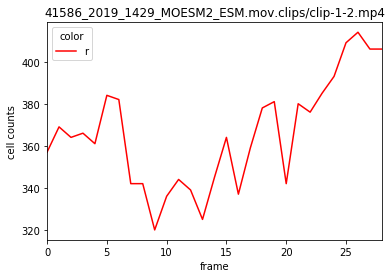

In [24]:
blobcounts = blobs.groupby(['frame', 'color']).size().unstack()
blobcounts.plot(color=blobcounts.columns.tolist())
plt.ylabel('cell counts');
plt.title(moviefile);

In [25]:
filename = '../data/movies/{:s}'.format(moviefile)
vid = imageio.get_reader(filename,  'ffmpeg')

def f(img_idx):
    plotting.plot_blob_overlay(vid, img_idx, blobs);

interactive_plot = widgets.interactive(f, img_idx=widgets.IntSlider(
    min=0, max=vid.count_frames()-1, continuous_update=False))

output = interactive_plot.children[-1]
output.layout.height = '550px'
output.layout.width = '550px'
interactive_plot

interactive(children=(IntSlider(value=0, continuous_update=False, description='img_idx', max=28), Output(layou…

In [ ]:
from flowermodel.calculate_rdf import vidrdf

moviefile = '41586_2019_1429_MOESM2_ESM.mov.clips'
data_path = '/projects/chuang-lab/jnh/flower/data'

for idx1 in range(2):
    for idx2 in range(4):
        clipfile = 'clip-{}-{}.mp4'.format(idx1, idx2)
        rdfobj = vidrdf(data_path, os.path.join(moviefile, clipfile), nbins=500, shellwidth=5)
        rdfobj.get_rdfs_for_all_colorpairs()


 72%|███████▏  | 21/29 [00:47<00:19,  2.38s/it]/projects/chuang-lab/jnh/flower/flowermodel/flowermodel/calculate_rdf.py:110: RuntimeWarning: invalid value encountered in long_scalars
  rdf = ((r1 <= self.dist) & (self.dist < r2)).sum()/ self.N/ a
 90%|████████▉ | 26/29 [00:57<00:07,  2.34s/it]

In [16]:
from flowermodel.calculate_rdf import get_maxrdf_locs
data_path = '/projects/chuang-lab/jnh/flower/data'
rdffiles = get_maxrdf_locs(data_path)

In [17]:
rdffiles.sort_values(['maxrdf_loc', 'celltypes', 'color-pair'])

,rdffile,movfile,color-pair,celltypes,time,array_size,maxrdf_loc
14,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM8_ESM.mov,gr,Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP),0-24.09hr,"(1024, 1024, 34)",20.686869
1,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM8_ESM.mov,rg,Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP),0-24.09hr,"(1024, 1024, 34)",20.686869
6,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM4_ESM.mov,gr,hFwe1(GFP)-hFwe2(RFP),0-23.707hr,"(1024, 1024, 271)",20.686869
11,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM5_ESM.mov,gr,hFwe1(GFP)-hFwe2(RFP),:10-26:18hr,"(1024, 1024, 262)",20.686869
2,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM4_ESM.mov,rg,hFwe1(GFP)-hFwe2(RFP),0-23.707hr,"(1024, 1024, 271)",20.686869
15,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM5_ESM.mov,rg,hFwe1(GFP)-hFwe2(RFP),:10-26:18hr,"(1024, 1024, 262)",20.686869
3,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM3_ESM.mov,gr,hFwe1(GFP)-hFwe1(RFP),0-23.707hr,"(1024, 1024, 378)",31.030303
13,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM3_ESM.mov,rg,hFwe1(GFP)-hFwe1(RFP),0-23.707hr,"(1024, 1024, 378)",31.030303
5,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM8_ESM.mov,gg,Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP),0-24.09hr,"(1024, 1024, 34)",41.373737
10,/projects/chuang-lab/jnh/flower/data/blobs/415...,41586_2019_1429_MOESM8_ESM.mov,rr,Z-VAD-FMK:hFwe1(GFP)-hFwe2(RFP),0-24.09hr,"(1024, 1024, 34)",41.373737


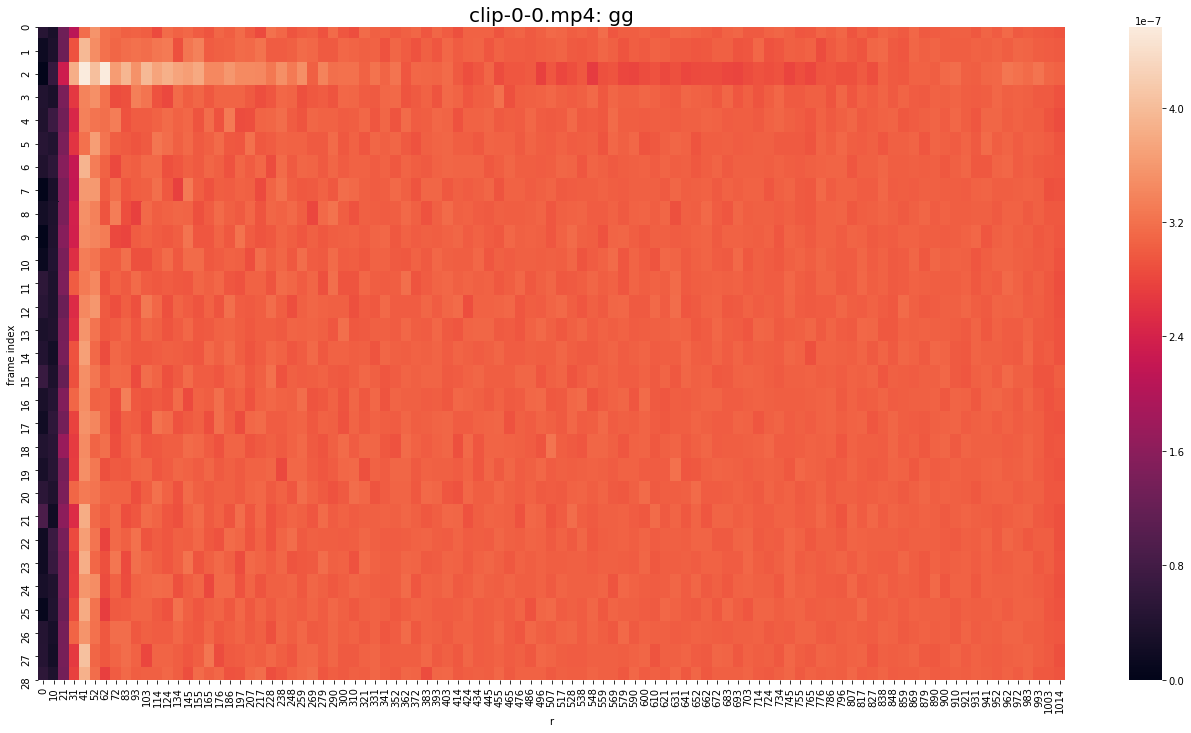

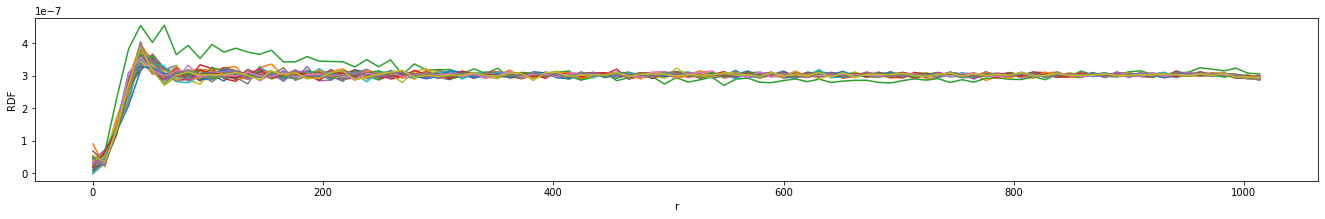

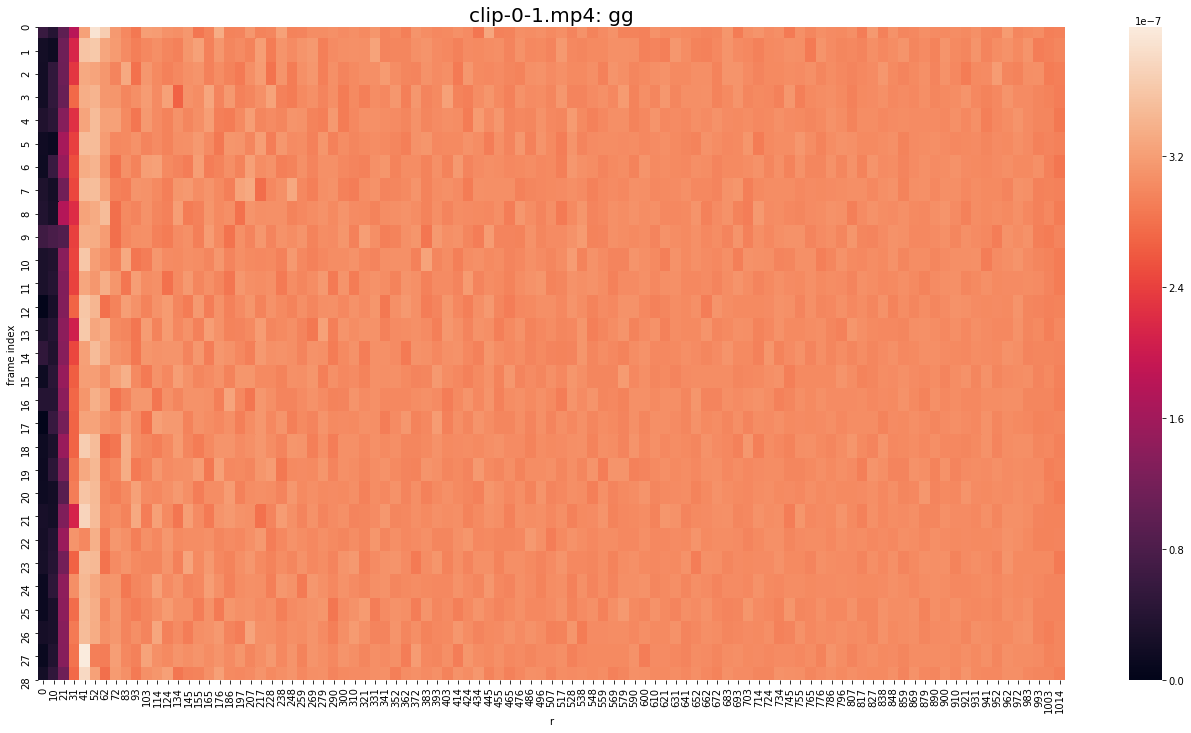

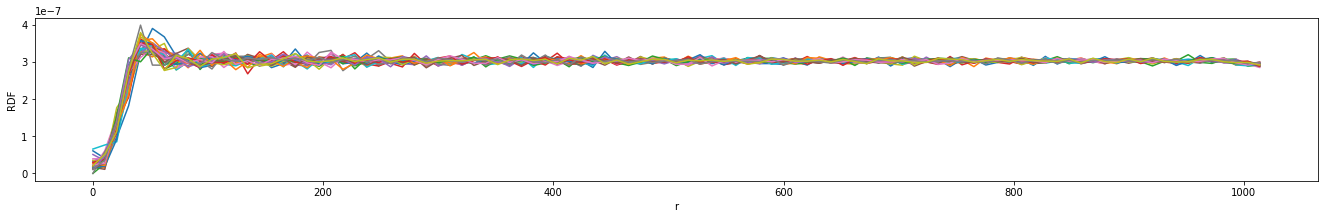

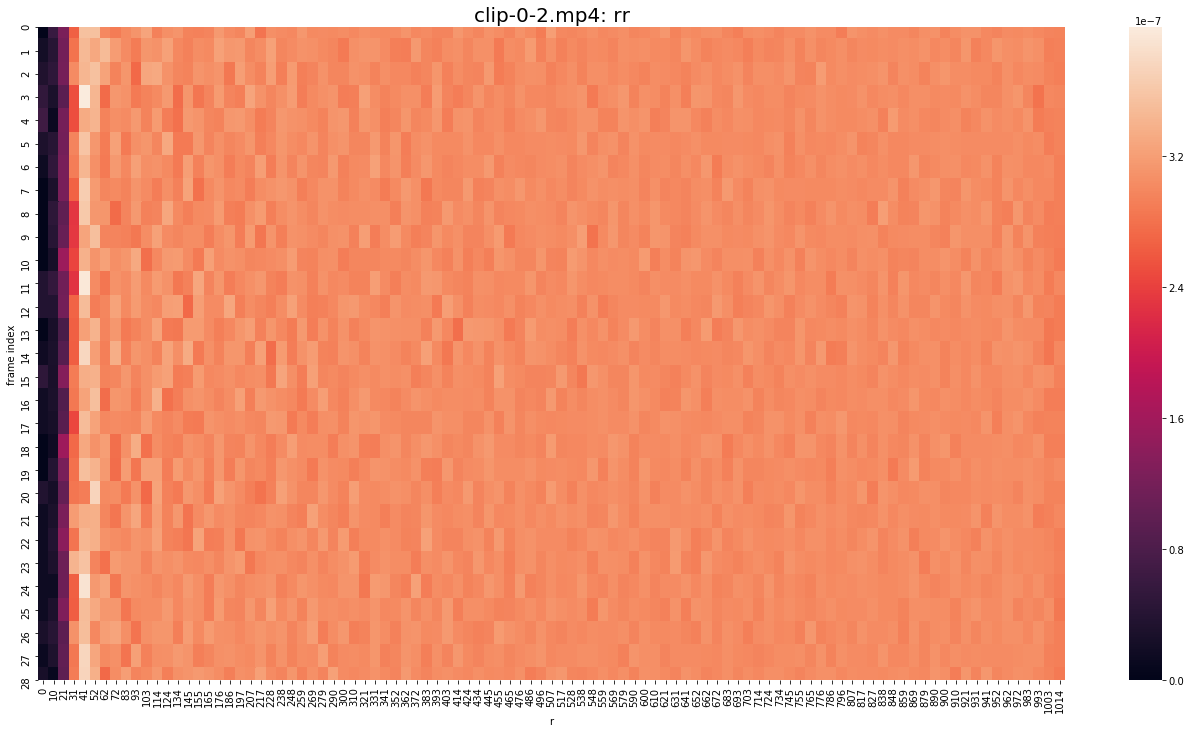

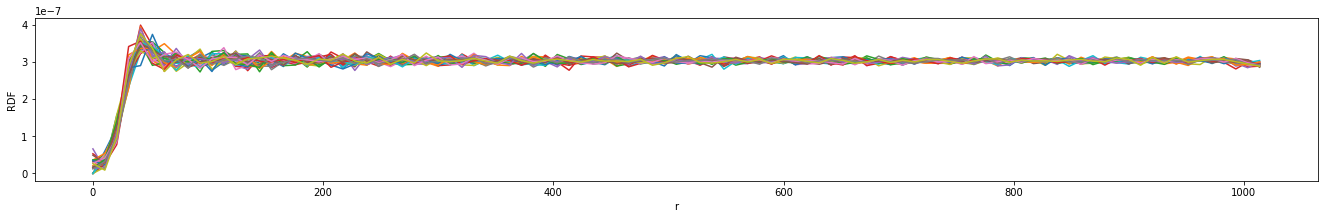

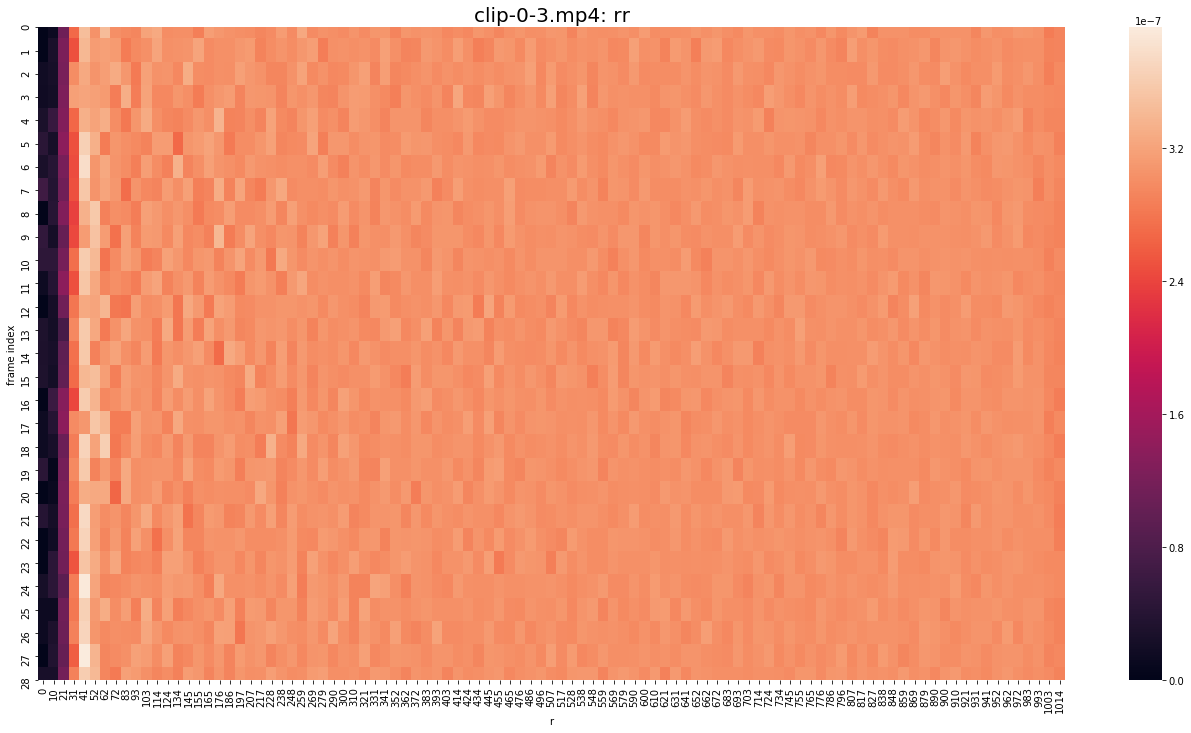

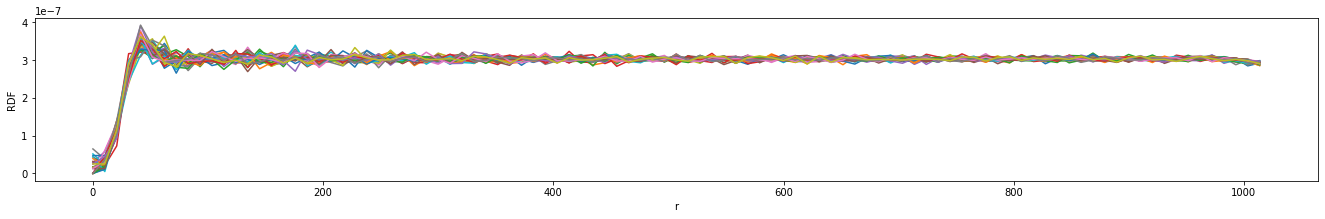

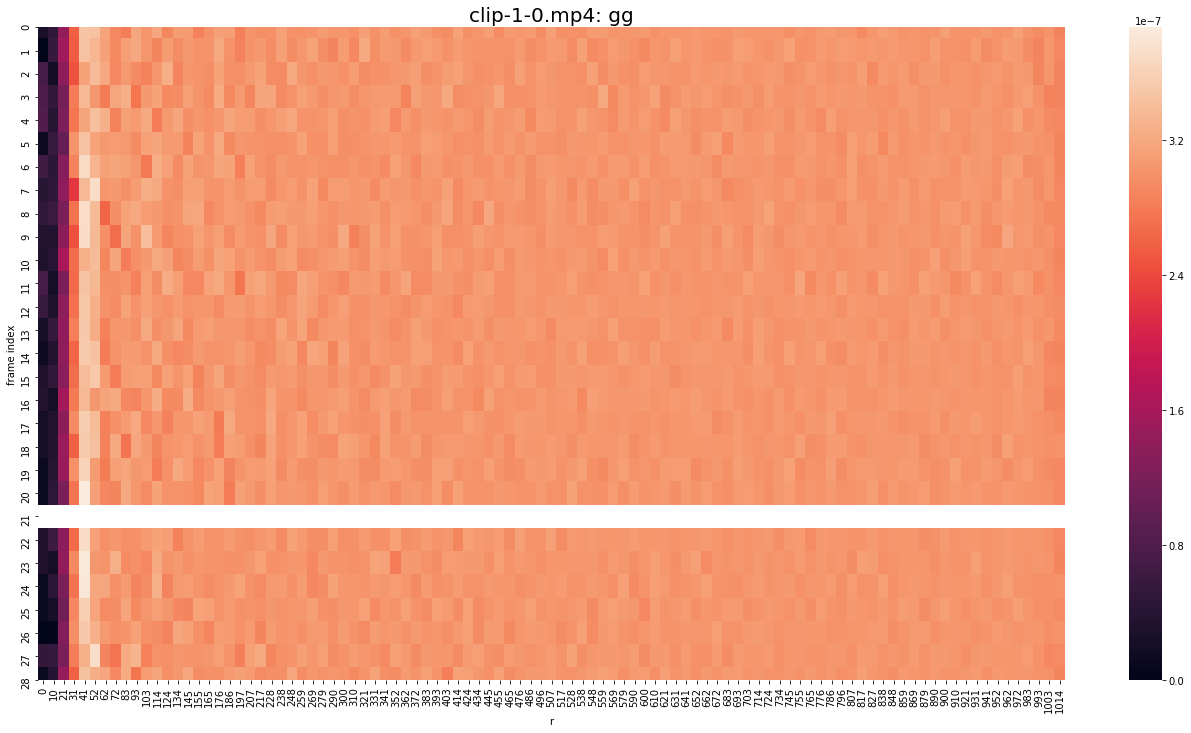

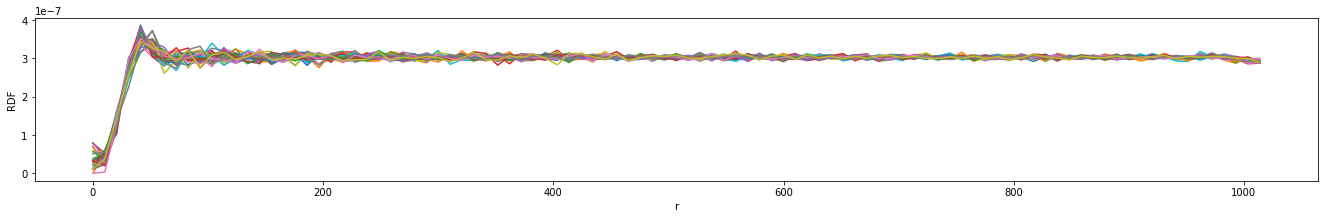

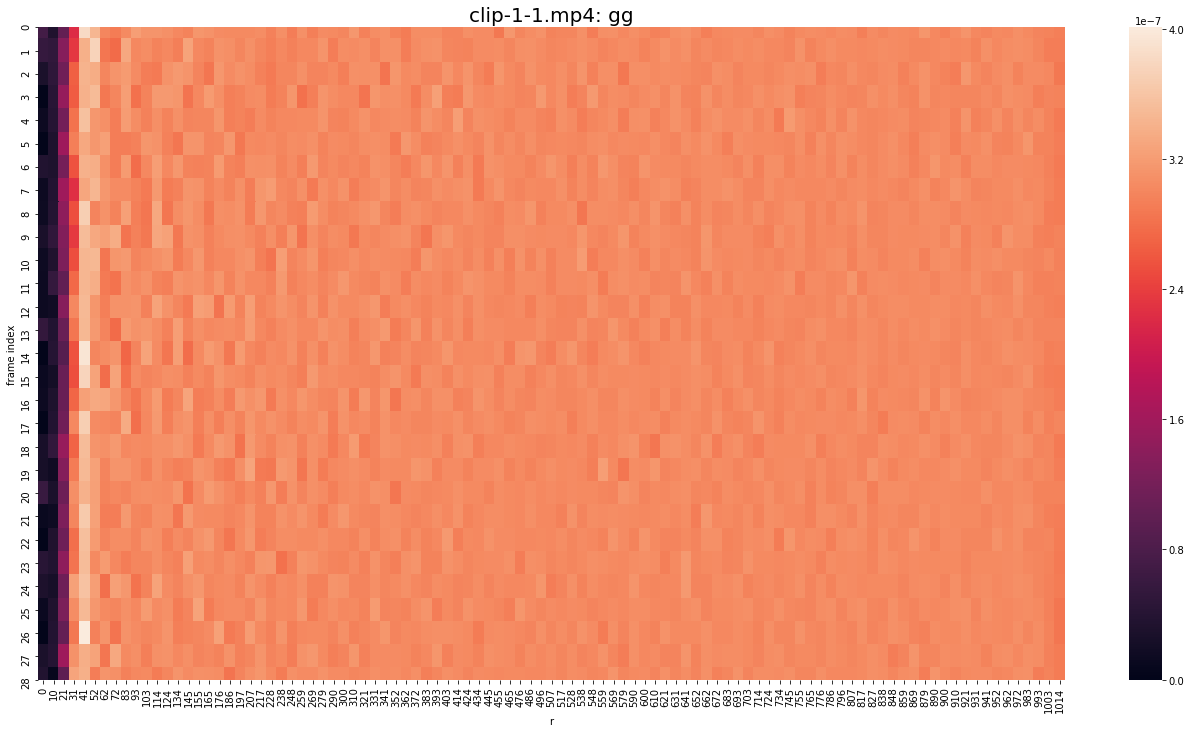

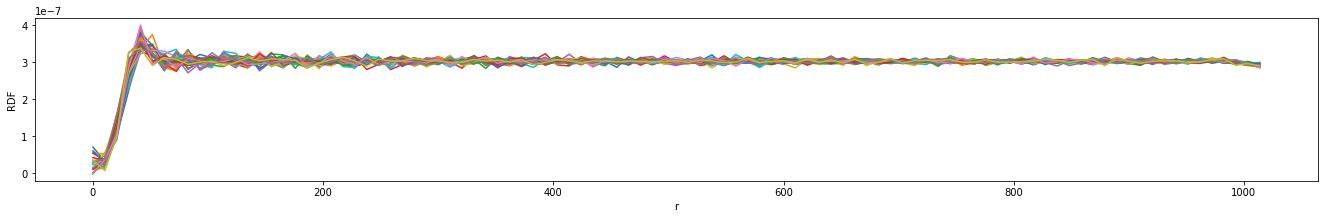

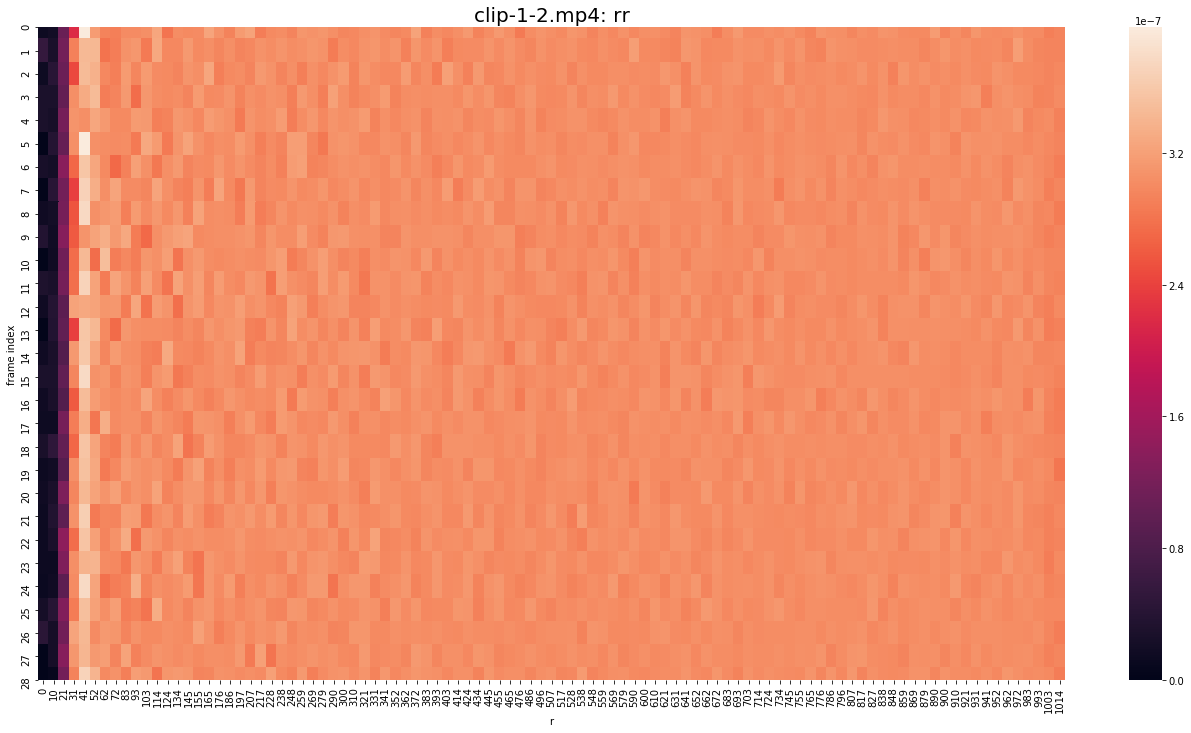

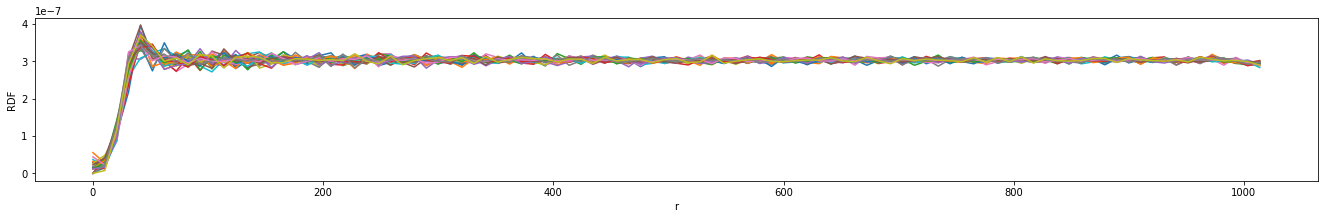

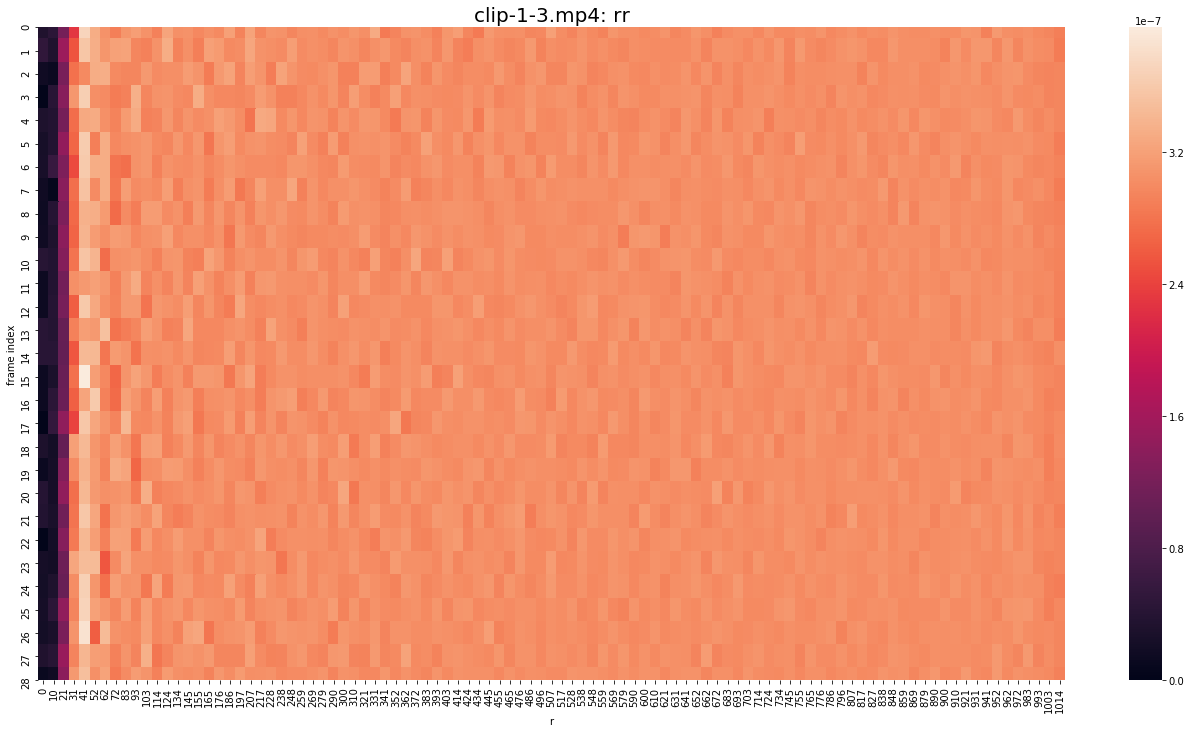

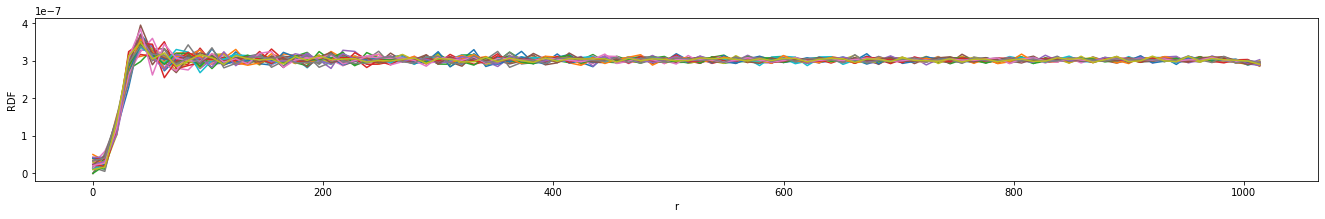

In [18]:
from flowermodel.plotting import plot_rdf_heatmap, plot_rdfs

moviefile = '41586_2019_1429_MOESM2_ESM.mov.clips'
data_path = '/projects/chuang-lab/jnh/flower/data'

for idx1 in range(2):
    for idx2 in range(4):
        clip = 'clip-{}-{}.mp4'.format(idx1, idx2)

        rdf_file = glob.glob('{:s}/blobs/{:s}/{:s}.blob.rdf.color_??.csv'.format(data_path, moviefile, clip))[0]
        plot_rdf_heatmap(rdf_file)
        plt.title('{:s}: {:s}{:s}'.format(clip, rdf_file[-6], rdf_file[-5]), size=20)
        plot_rdfs(rdf_file)

# Scratch

In [36]:
moviefile = '41586_2019_1429_MOESM2_ESM.mov.clips'
data_path = '/projects/chuang-lab/jnh/flower/data'
clipfile = 'clip-{}-{}.mp4'.format(idx1, idx2)

rdfobj = vidrdf(data_path, os.path.join(moviefile, clipfile), nbins=500, shellwidth=5)
rdfobj.get_rdfs_for_all_colorpairs()



100%|██████████| 29/29 [01:06<00:00,  2.30s/it]


In [55]:
rdf_file = rdffiles['rdffile'].iloc[0]
rdf = pd.read_csv(rdf_file, index_col=0)
tmp = rdf.sum()
tmp.index = tmp.index.astype(float)
np.diff(tmp.index)

array([10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34343434,
       10.34343434, 10.34343434, 10.34343434, 10.34343434, 10.34

In [11]:
vid = imageio.get_reader(filename,  'ffmpeg')

In [12]:
img_idx = 0
# img = fb.get_image(vid, img_idx)
img = vid.get_data(img_idx)

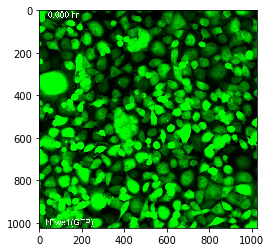

In [13]:
plt.imshow(img)

In [2]:
!flowermodel framecount --filename /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM8_ESM.mov

34


In [11]:
%%bash
idx=8
flowermodel pbs --filename /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM${idx}_ESM.mov --jobname blob${idx}

qsub blob${idx}.pbs

10553235[].helix-master


In [4]:
from moviepy.editor import VideoFileClip
from flowermodel import util
import os

filename = '/projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov'
clip = VideoFileClip(filename)

(nrows, ncols) = (2,4)
L = clip.get_frame(0).shape[0]//nrows

clipspath = filename+'.clips'
util.mkdir_if_not_exist(clipspath)

for i in range(nrows):
    for j in range(ncols):
        clipname = 'clip-{:d}-{:d}.mp4'.format(i, j)
        print('Analyzing ', clipname)        
        clipfile = os.path.join(clipspath, clipname)

        croppedclip = clip.crop(y1=i*L, x1=j*L, width=L, height=L)       
        croppedclip.write_videofile(clipfile)

t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Analyzing  clip-0-0.mp4
Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-0.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-0.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-0.mp4
Analyzing  clip-0-1.mp4


t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-1.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-1.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-1.mp4
Analyzing  clip-0-2.mp4


t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-2.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-2.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-2.mp4
Analyzing  clip-0-3.mp4


t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-3.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-3.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-0-3.mp4
Analyzing  clip-1-0.mp4


t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-0.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-0.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-0.mp4
Analyzing  clip-1-1.mp4


t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-1.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-1.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-1.mp4
Analyzing  clip-1-2.mp4


t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-2.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-2.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-2.mp4
Analyzing  clip-1-3.mp4


t:   0%|          | 0/29 [00:00<?, ?it/s, now=None]

Moviepy - Building video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-3.mp4.
Moviepy - Writing video /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-3.mp4



Moviepy - Done !
Moviepy - video ready /projects/chuang-lab/jnh/flower/data/movies/41586_2019_1429_MOESM2_ESM.mov.clips/clip-1-3.mp4
